In [1]:
%matplotlib inline
import cv2
import os
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import glob
from scipy import misc
import numpy as np
from scipy.cluster.vq import kmeans, vq

In [2]:
# kmeans?
# cv2.SIFT?

kmeans(obs, k_or_guess, iter=20, thresh=1e-05, check_finite=True)

codebook : ndarray
   A k by N array of k centroids. The i'th centroid
   codebook[i] is represented with the code i. The centroids
   and codes generated represent the lowest distortion seen,
   not necessarily the globally minimal distortion.

distortion : float
   The distortion between the observations passed and the
   centroids generated.

In [3]:
data_path = os.path.expanduser('~/Data/bof')

In [4]:
train_path = os.path.join(data_path, 'train')
test_path = os.path.join(data_path, 'test')

In [5]:
min_feature_num = 50
feature_tool = cv2.SIFT()
# feature_tool = cv2.ORB(nfeatures=min_feature_num)
# sift = cv2.SIFT(nfeatures=min_feature_num)

In [6]:
X_train_des = []
for train_path_y_id, train_path_y_name in enumerate(os.listdir(train_path)):
#     print('train_path_y_name:', train_path_y_name)
#     print('train_path_y_id:', train_path_y_id)
    X_train_dir = os.path.join(train_path, train_path_y_name, '*.jpg')
    for X_train_file_name in glob.glob(X_train_dir):
#         print('X_train_file_name:', X_train_file_name)
        img = cv2.imread(X_train_file_name)
        kp, des = feature_tool.detectAndCompute(img, None)
        des_len = des.shape[0]
        for des_len_item in range(des_len):
            X_train_des.append(des[des_len_item])

In [7]:
k_words = 1000
codebook, distortion = kmeans(X_train_des, k_words, iter=4)

In [8]:
def get_words_feature(des, k_words, codebook):
    des_len = des.shape[0]
    words_feature = np.zeros(k_words, dtype=np.float32)
    for des_len_item in range(des_len):
        des_item = des[des_len_item]
        words, distance = vq(des_item.reshape(1, -1), codebook)
        for word in words:
            words_feature[word] += words_feature[word]+1
    return words_feature

In [9]:
X_train = []
y_train = []
y_train_names = []
X_train_img_path = []
for train_path_y_id, train_path_y_name in enumerate(os.listdir(train_path)):
    y_train_names.append(train_path_y_name)
#     print('train_path_y_name:', train_path_y_name)
#     print('train_path_y_id:', train_path_y_id)
    X_train_dir = os.path.join(train_path, train_path_y_name, '*.jpg')
    for X_train_file_name in glob.glob(X_train_dir):
#         print('X_train_file_name:', X_train_file_name)
        img = cv2.imread(X_train_file_name)
        kp, des = feature_tool.detectAndCompute(img, None)
        words_feature = get_words_feature(des, k_words, codebook)
#         print('words_feature.shape:', words_feature.shape)
#         print('max(words_feature):', max(words_feature))
#             X_train_des.append(des[des_len_item])
        X_train.append(words_feature)
        y_train.append(train_path_y_id)
        X_train_img_path.append(X_train_file_name)
#         print('img.shape:', img.shape)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [10]:
model = SVC()

In [11]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
# model.predict(X_train)-y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [13]:
X_test = []
y_test = []
y_test_names = []
X_test_img_path = []
for test_path_y_id, test_path_y_name in enumerate(os.listdir(test_path)):
    y_test_names.append(test_path_y_name)
#     print('test_path_y_name:', test_path_y_name)
#     print('test_path_y_id:', test_path_y_id)
    X_test_dir = os.path.join(test_path, test_path_y_name, '*.jpg')
    for X_test_file_name in glob.glob(X_test_dir):
#         print('X_test_file_name:', X_test_file_name)
        img = cv2.imread(X_test_file_name)
        kp, des = feature_tool.detectAndCompute(img, None)
        words_feature = get_words_feature(des, k_words, codebook)
#         print('words_feature.shape:', words_feature.shape)
#         print('max(words_feature):', max(words_feature))
#             X_test_des.append(des[des_len_item])
        X_test.append(words_feature)
        y_test.append(test_path_y_id)
        X_test_img_path.append(X_test_file_name)
#         print('img.shape:', img.shape)
X_test = np.array(X_test)
y_test = np.array(y_test)

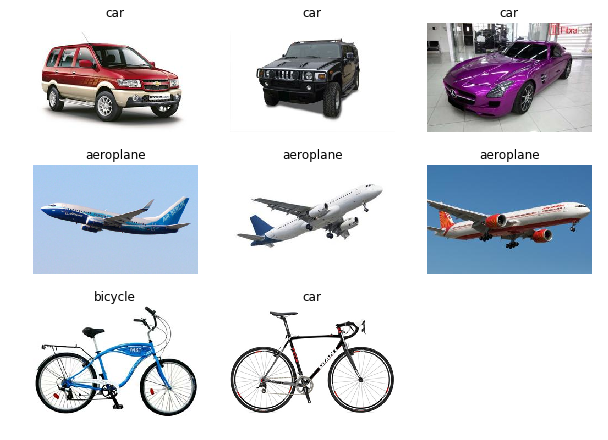

In [14]:
X_test_len = X_test.shape[0]
plt.figure(figsize=(10, 10))
for X_test_id, X_test_img_path_item in enumerate(X_test_img_path):
#     print('X_test_img_path_item:', X_test_img_path_item)
    img = misc.imread(X_test_img_path_item)
    y_test_pred = model.predict(X_test[X_test_id].reshape(1, -1))[0]
    y_test_pred_name = y_test_names[y_test_pred]
#     print('y_test_pred_name:', y_test_pred_name)
    plt.subplot(4, X_test_len//4+1, X_test_id+1)
    plt.imshow(img)
    plt.title(y_test_pred_name)
    plt.axis('off')

In [15]:
# X_train_len = X_train.shape[0]
# plt.figure(figsize=(10, 10))
# for X_train_id, X_train_img_path_item in enumerate(X_train_img_path):
# #     print('X_train_img_path_item:', X_train_img_path_item)
#     img = misc.imread(X_train_img_path_item)
#     y_train_pred = model.predict(X_train[X_train_id].reshape(1, -1))[0]
#     y_train_pred_name = y_train_names[y_train_pred]
# #     print('y_train_pred_name:', y_train_pred_name)
#     plt.subplot(20, X_train_len//20+1, X_train_id+1)
#     plt.imshow(img)
#     plt.title(y_train_pred_name)
#     plt.axis('off')

In [17]:
codebook.shape

(1000, 128)